In [2]:
# default_exp orbital

# Visualizing the SpaceX Tesla Roadster trip to Mars
Example taken from [poliastro docs](
https://hub.gke2.mybinder.org/user/poliastro-poliastro-4oek8xlv/notebooks/docs/source/examples/Visualizing%20the%20SpaceX%20Tesla%20Roadster%20trip%20to%20Mars.mystnb).

In [12]:
from astropy.time import Time
from astropy import units as u

from poliastro.bodies import Earth, Mars, Sun
from poliastro.ephem import Ephem
from poliastro.frames import Planes
from poliastro.plotting import OrbitPlotter3D
from poliastro.util import time_range

EPOCH = Time("2018-02-18 12:00:00", scale="tdb")

In [13]:
# More info: https://plotly.com/python/renderers/
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

In [15]:
roadster = Ephem.from_horizons(
    "SpaceX Roadster",
    epochs=time_range(EPOCH, end=EPOCH + 360 * u.day),
    attractor=Sun,
    plane=Planes.EARTH_ECLIPTIC
)
roadster

Ephemerides at 50 epochs from 2018-02-18 12:00:00.000 (TDB) to 2019-02-13 12:00:00.000 (TDB)

In [16]:
from poliastro.plotting.misc import plot_solar_system

([<matplotlib.lines.Line2D at 0x7f078e292580>],
 <matplotlib.lines.Line2D at 0x7f078dfcbbe0>)

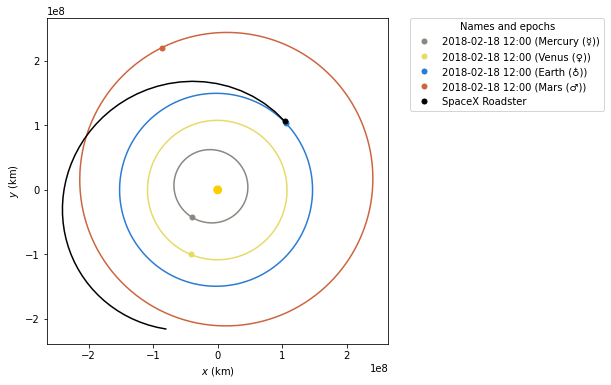

In [91]:
frame = plot_solar_system(outer=False, epoch=EPOCH)
frame = frame.plot_ephem(roadster, EPOCH, label="SpaceX Roadster", color="black")
frame

In [65]:
type(frame[0][0])

matplotlib.lines.Line2D

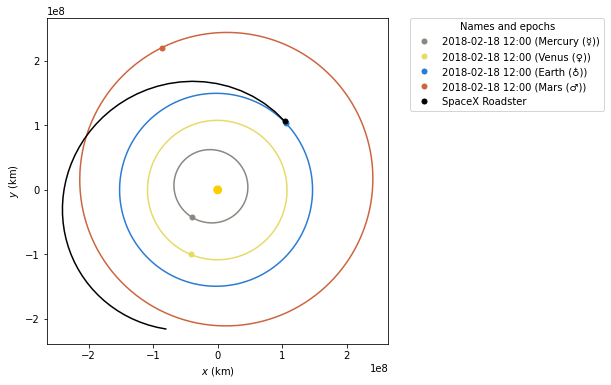

In [64]:
frame[0][0].figure

In [66]:
frame = OrbitPlotter3D(plane=Planes.EARTH_ECLIPTIC)

frame.plot_body_orbit(Earth, EPOCH)
frame.plot_body_orbit(Mars, EPOCH)

frame.plot_ephem(roadster, EPOCH, label="SpaceX Roadster", color="black")

frame.set_view(45 * u.deg, -120 * u.deg, 4 * u.km);

In [71]:
type(frame)

poliastro.plotting.core.OrbitPlotter3D

Help from https://github.com/JackCSheehan/orbital-decay-simulator

https://github.com/JackCSheehan/orbital-decay-simulator/blob/main/src/plotting.py

In [78]:
from poliastro.earth.plotting import GroundtrackPlotter
f = GroundtrackPlotter()

# Map element colors
_LAND_COLOR = "white"
_WATER_COLOR = "rgb(140, 181, 245)"
_COUNTRY_COLOR = "lightgray"

f.fig.update_geos(
    projection_type = "orthographic",
    bgcolor = "rgba(0, 0, 0, 0)",
    showframe = False,
    lataxis = {"showgrid" : False},
    lonaxis = {"showgrid" : False},
    showlakes = True,
    showcountries = True,
    showrivers = True,
    oceancolor = _WATER_COLOR,
    landcolor = _LAND_COLOR,
    lakecolor = _WATER_COLOR,
    rivercolor = _WATER_COLOR,
    countrycolor = _COUNTRY_COLOR,
)

f.fig.update_layout(
    showlegend = False,
    margin = {"l" : 0, "r" : 0, "b" : 0, "t" : 0}
)

# New Horizons launch and trajectory¶
example from  
https://docs.poliastro.space/en/stable/examples/Exploring%20the%20New%20Horizons%20launch.html

In [79]:
from astropy import time
from astropy import units as u

from poliastro import iod

from poliastro.bodies import Sun, Earth, Jupiter
from poliastro.ephem import Ephem
from poliastro.frames import Planes
from poliastro.plotting import StaticOrbitPlotter
from poliastro.twobody import Orbit
from poliastro.util import norm

[0.         7.81989358 0.        ] km / s


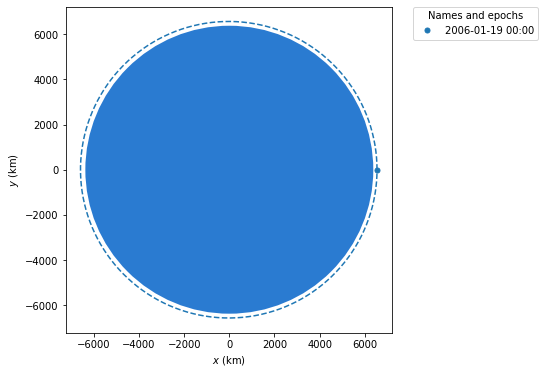

In [96]:
r_p = Earth.R + 165 * u.km
r_a = Earth.R + 215 * u.km

a_parking = (r_p + r_a) / 2
ecc_parking = 1 - r_p / a_parking

parking = Orbit.from_classical(
    Earth,
    a_parking,
    ecc_parking,
    0 * u.deg,
    0 * u.deg,
    0 * u.deg,
    0 * u.deg,  # We don't mind
    time.Time("2006-01-19", scale="utc"),
)

print(parking.v)
p = parking.plot()
p

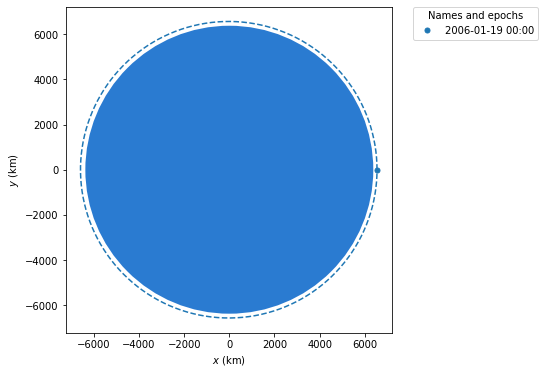

In [94]:
p[0].figure